In [1]:
import os
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import PIL
random_seed = 42

Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### MobileNet

In [4]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

In [11]:
base_model = MobileNet(input_shape = (160, 160, 3), weights = 'imagenet', include_top = False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x) 
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
preds = Dense(8, activation = 'softmax')(x)

mobilenet_model = Model(inputs = base_model.input, outputs = preds)

mobilenet_model.compile(optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

mobilenet_model.summary()

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

training_set = train_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_set = validation_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/validation_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

checkpoint_callback = ModelCheckpoint('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/snapshots/model_mobilenet_lr0.001_bs16_{epoch:02d}.hdf5',
                                      monitor = 'val_accuracy',
                                      verbose = 0,
                                      save_best_only = True,
                                      save_weights_only = False,
                                      mode = 'auto')

hist = mobilenet_model.fit_generator(training_set,
                    steps_per_epoch = 100, 
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 25,
                    callbacks = [checkpoint_callback])

epochs = 20

plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/plots/mobilenet4.png')

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128 

Found 6696 images belonging to 8 classes.
Found 1625 images belonging to 8 classes.
Epoch 1/20
100/100 [==============================] - 128s 1s/step - loss: 1.0469 - accuracy: 0.6762 - val_loss: 3.0744 - val_accuracy: 0.4900
Epoch 2/20
100/100 [==============================] - 121s 1s/step - loss: 0.8183 - accuracy: 0.7600 - val_loss: 1.1875 - val_accuracy: 0.6075
Epoch 3/20
100/100 [==============================] - 121s 1s/step - loss: 0.8150 - accuracy: 0.7544 - val_loss: 2.2898 - val_accuracy: 0.3675
Epoch 4/20
  8/100 [=>............................] - ETA: 1:46 - loss: 0.7277 - accuracy: 0.7656

KeyboardInterrupt: 

### VGG - 16

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0  

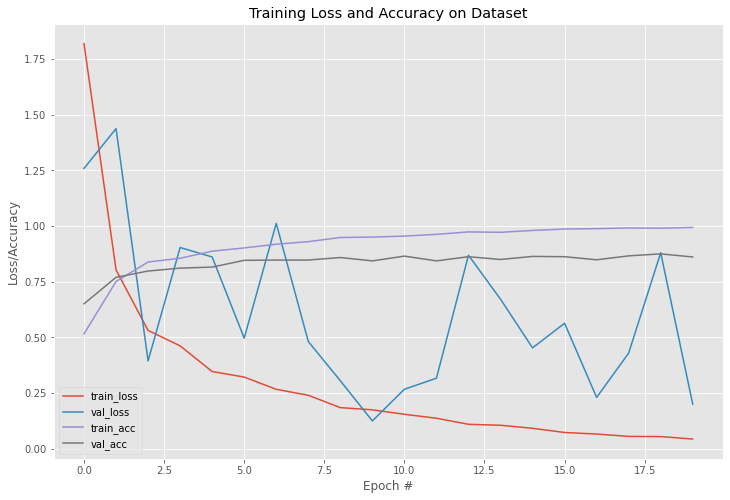

In [15]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

base_model = VGG16(input_shape = (160, 160, 3), weights = 'imagenet', include_top = False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
preds = Dense(8, activation = 'softmax')(x)

vgg_model = Model(inputs = base_model.input, outputs = preds)

vgg_model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

vgg_model.summary()

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

training_set = train_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_set = validation_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/validation_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

checkpoint_callback = ModelCheckpoint('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/snapshots/model_vgg_lr0.0001_bs32_{epoch:02d}.hdf5',
                                      monitor = 'val_accuracy',
                                      verbose = 0,
                                      save_best_only = True,
                                      save_weights_only = False,
                                      mode = 'auto')

hist = vgg_model.fit_generator(training_set,
                    steps_per_epoch = 100, 
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 25,
                    callbacks = [checkpoint_callback])

epochs = 20

plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/plots/vgg4.png')

### ResNet

C:\Users\ankit\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 80, 80, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

Found 6696 images belonging to 8 classes.
Found 1625 images belonging to 8 classes.
Epoch 1/20
100/100 [==============================] - 140s 1s/step - loss: 1.1947 - accuracy: 0.6469 - val_loss: 0.3295 - val_accuracy: 0.8600
Epoch 2/20
100/100 [==============================] - 136s 1s/step - loss: 0.4671 - accuracy: 0.8571 - val_loss: 0.3059 - val_accuracy: 0.8725
Epoch 3/20
100/100 [==============================] - 135s 1s/step - loss: 0.3401 - accuracy: 0.8964 - val_loss: 0.3371 - val_accuracy: 0.8676
Epoch 4/20
100/100 [==============================] - 137s 1s/step - loss: 0.3491 - accuracy: 0.8884 - val_loss: 0.1478 - val_accuracy: 0.9050
Epoch 5/20
100/100 [==============================] - 136s 1s/step - loss: 0.2604 - accuracy: 0.9128 - val_loss: 0.7746 - val_accuracy: 0.8979
Epoch 6/20
100/100 [==============================] - 136s 1s/step - loss: 0.2635 - accuracy: 0.9156 - val_loss: 0.3173 - val_accuracy: 0.9000
Epoch 7/20
100/100 [==============================] - 136s

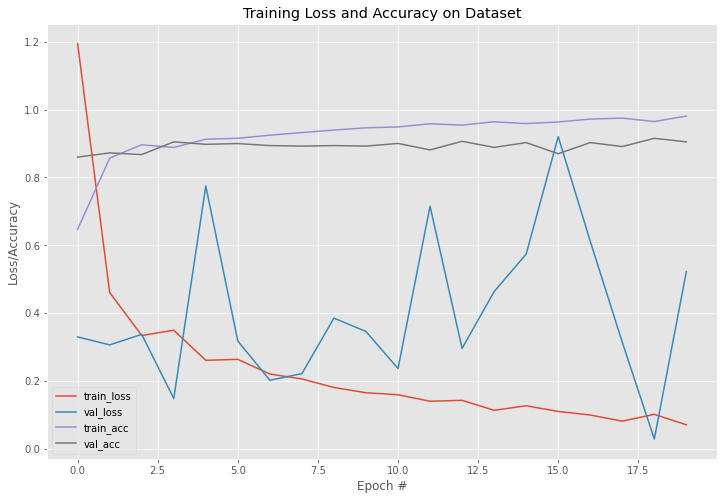

In [19]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

base_model = ResNet50(input_shape = (160, 160, 3), weights = 'imagenet', include_top = False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
preds = Dense(8, activation = 'softmax')(x)

resnet_model = Model(inputs = base_model.input, outputs = preds)

resnet_model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

resnet_model.summary()

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

training_set = train_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_set = validation_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/validation_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

checkpoint_callback = ModelCheckpoint('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/snapshots/model_resnet_lr0.0001_bs32_{epoch:02d}.hdf5',
                                      monitor = 'val_accuracy',
                                      verbose = 0,
                                      save_best_only = True,
                                      save_weights_only = False,
                                      mode = 'auto')

hist = resnet_model.fit_generator(training_set,
                    steps_per_epoch = 100, 
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 25,
                    callbacks = [checkpoint_callback])

epochs = 20

plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/plots/resnet4.png')

### Inception V3

In [23]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

base_model = InceptionV3(input_shape = (160, 160, 3), weights = 'imagenet', include_top = False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
preds = Dense(8, activation = 'softmax')(x)

inception_model = Model(inputs = base_model.input, outputs = preds)

inception_model.compile(optimizer = Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

inception_model.summary()

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

training_set = train_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_set = validation_datagen.flow_from_directory('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/validation_set',
                                                 target_size = (160, 160),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

checkpoint_callback = ModelCheckpoint('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/snapshots/model_inception_lr0.001_bs32_{epoch:02d}.hdf5',
                                      monitor = 'val_accuracy',
                                      verbose = 0,
                                      save_best_only = True,
                                      save_weights_only = False,
                                      mode = 'auto')

hist = inception_model.fit_generator(training_set,
                    steps_per_epoch = 100, 
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 25,
                    callbacks = [checkpoint_callback])

epochs = 20

plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/plots/inception2.png')

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 79, 79, 32)   864         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 79, 79, 32)   96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_479 (Activation)     (None, 79, 79, 32)   0           batch_normalization_283[0][0]    
___________________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_364 (Conv2D)             (None, 3, 3, 384)    1548288     activation_559[0][0]             
__________________________________________________________________________________________________
batch_normalization_360 (BatchN (None, 3, 3, 384)    1152        conv2d_360[0][0]                 
__________________________________________________________________________________________________
batch_normalization_364 (BatchN (None, 3, 3, 384)    1152        conv2d_364[0][0]                 
__________________________________________________________________________________________________
activation_556 (Activation)     (None, 3, 3, 384)    0           batch_normalization_360[0][0]    
__________________________________________________________________________________________________
activation_560 (Activation)     (None, 3, 3, 384)    0           batch_normalization_364[0][0]    
__________

Found 6696 images belonging to 8 classes.
Found 1625 images belonging to 8 classes.
Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[32,64,77,77] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node SquaredDifference_685 (defined at C:\Users\ankit\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_447380]

Function call stack:
keras_scratch_graph
